Multiple Linear Regression
Here we will be able to use scikit learn to implement Multiple Linear regression
And to create a mode, to train, test it, and use the model

In [6]:
import matplotlib.pyplot as plt #create visualization like charts and graphs
import pandas as pd             # powerful data manipulation library
import pylab as pl              # combines matplotlib and numpy func, if you use matplotlib directly is not needed
import numpy as np              # a library for numerical operations, using np as an alias
%matplotlib inline              
# A magic command only for Jupyter notebooks that enables inline plotting, displaying plots directly in the notebooks

To download the data, we will use !wget to download it from IBM Object Storage

In [10]:
!curl -o FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 72629  100 72629    0     0  35350      0  0:00:02  0:00:02 --:--:-- 35463


we have downloaded a fuel consumption dataset, which contains model- specific fuel consumption ratings and estimated carbon dioxide emissions
for new light duty vehicles for retail sale in Canada.
MODELYEAR e.g. 2014
MAKE e.g. Acura
MODEL e.g. ILX
VEHICLE CLASS e.g. SUV
ENGINE SIZE e.g. 4.7
CYLINDERS e.g 6
TRANSMISSION e.g. A6
FUELTYPE e.g. z
FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [12]:
df = pd.read_csv("FuelConsumption.csv")   #this line reads data from a CSV file 
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
#Lets select some features that we want to use for regression
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9) #this line created a new DataFrame names cfd that contains only e subset of columns from the original DataFrame df.

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


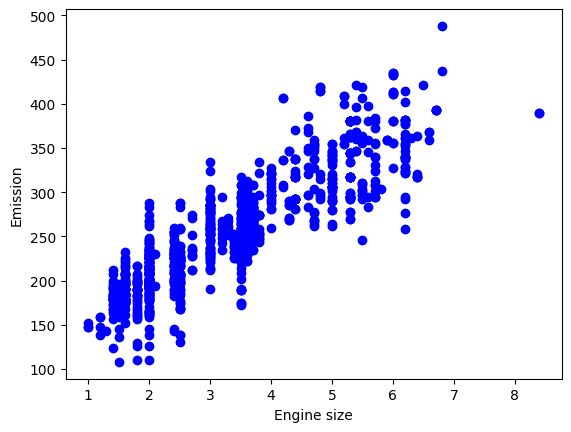

In [16]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue') #this func generates a scatter plot
plt.xlabel("Engine size")                                    # this line sets the label for the x-axis of the plot as "engine size"
plt.ylabel("Emission")
plt.show()

In [ ]:
Creating train and test dataset 
Train/test involves splitting the dataset into training and testing sets respectively, which are mutually exlusive. Ater which you train with the training
set and test with the testing set, This will provide a more accurate evaluation on out-of-sample accuracu because the testing dataset is not part of the 
dataset that has been used to train the model. Therefore it gives us a better understanding of how well our model generalizes on new data.

In [19]:
msk = np.random.rand(len(df)) < 0.8 #this generates an array of random numbers between 0 and 1, with the same lengsh as the number of rows in the DataFrame
train = cdf[msk]                     # < 0,8 this compares each nr to 0,8, if the randon nr is less than 0,8 the condition returns True, otherwise false
test = cdf [msk]

Train Data Distribution

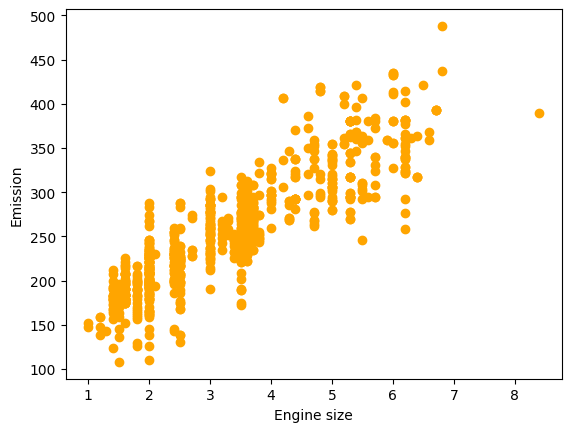

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "orange")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Multiple regression Model
In reality, there are multiple varibles that impact the co2emission. When more than one independent varible is present, the process is called Multiple LR
An example of multiple Linear regression is predicting co2emission using the features  FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. 
The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [24]:
#This code is implementing a multiple linear regression model using the LinearRegression class from the sklearn(scikit-learn)library 
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.68728571  6.90065834 10.32689926]]


10.68728571- ENGINE SIZE, for each unit increase in engine size, CO2 emissions are expected to increase by approx 10,69units, assuming other features
remain constrant.
This means vehicles with larger engines tend to produce more CO2 emissions
6.90065834 - CYLINDERS , for each additional cylinder in the engine, CO2 emissions are expected to increase by about 6,9 units, assuming engine size
and fuel consumption stay the same.
10.32689926- FUEL CONSUMPTION This shows that higher fuel consumption leads to more CO2 emissions, which makes sense since vehicles that burn 
more fuel produce more emissions

As mentioned before, Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple linear regression model with 3 
parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. 
Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

In [26]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 542.89
Variance score: 0.87


C:\Users\Valentina\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


MSE- measures the average of the squared differences between the actual value (y) and the predicted value (y_hat)
in our case MSE  of 542,89 means an overage,  the suqare of the difference between the predicted CO2 emissions and the actual CO2 emissions is 154,89
units . An MSE of 542.89 indicates some error between the predictions and the actual values, but without a baseline or comparison, 
it's hard to say if this is a "good" or "bad" result. Lower values are better

Variance Score (R² Score): 0.87  (R²), also known as the coefficient of determination, measures how well the independent variables
(engine size, cylinders, fuel consumption) explain the variability of the dependent variable (CO2 emissions).
A variance score of 0.87 means that 87% of the variability in CO2 emissions can be explained by the independent variables (engine size, cylinders, and fuel consumption).
This is a strong result, suggesting the model has done a good job of capturing the relationship between the features and CO2 emissions.
There is still 13% of the variability that the model cannot explain, which might be due to factors not included in the model or inherent randomness in the data.